In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def plot_omp_scalability(file_path):
    df_omp = pd.read_csv(file_path)
    agg_data = df_omp.groupby(['playground_size', 'mpi_task', 'threads'])['runtime'].agg(['mean', 'std']).reset_index()
    
    sizes = agg_data['playground_size'].unique()
    mpi_tasks = agg_data['mpi_task'].unique()

    for size in sizes:
        plt.figure(figsize=(12, 6))
        for mpi_task in mpi_tasks:
            filt_data = agg_data[(agg_data['playground_size'] == size) & 
                                  (agg_data['mpi_task'] == mpi_task)]
            plt.plot(filt_data['threads'], filt_data['mean'], label=f'MPI Task {mpi_task}', marker='o')
            plt.fill_between(filt_data['threads'], 
                             filt_data['mean'] - filt_data['std'], 
                             filt_data['mean'] + filt_data['std'], 
                             alpha=0.2)
        plt.title(f'Runtime vs Threads for Playground Size {size}', fontsize=14)
        plt.xlabel('Number of Threads', fontsize=12)
        plt.ylabel('Runtime (seconds)', fontsize=12)
        plt.legend(title='MPI Tasks')
        plt.xticks(filt_data['threads'])
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(12, 6))
        for mpi_task in mpi_tasks:
            filt_data = agg_data[(agg_data['playground_size'] == size) & 
                                  (agg_data['mpi_task'] == mpi_task)]
            single_thread_runtime = filt_data[filt_data['threads'] == 1]['mean'].values[0]
            filt_data = filt_data.copy()
            filt_data.loc[:, 'speedup'] = single_thread_runtime / filt_data['mean']
            filt_data.loc[:, 'speedup_std'] = (filt_data['std'] / filt_data['mean']) * filt_data['speedup']
            plt.plot(filt_data['threads'], filt_data['speedup'], label=f'MPI Task {mpi_task}', marker='o')
            plt.fill_between(filt_data['threads'], 
                             filt_data['speedup'] - filt_data['speedup_std'], 
                             filt_data['speedup'] + filt_data['speedup_std'], 
                             alpha=0.2)
        plt.plot(filt_data['threads'], filt_data['threads'], linestyle='--', color='r', label='Ideal Speedup')
        plt.title(f'Speedup vs Threads for Playground Size {size}', fontsize=14)
        plt.xlabel('Number of Threads', fontsize=12)
        plt.ylabel('Speedup', fontsize=12)
        plt.legend(title='MPI Tasks')
        plt.xticks(filt_data['threads'])
        plt.grid(True)
        plt.tight_layout()
        plt.show()


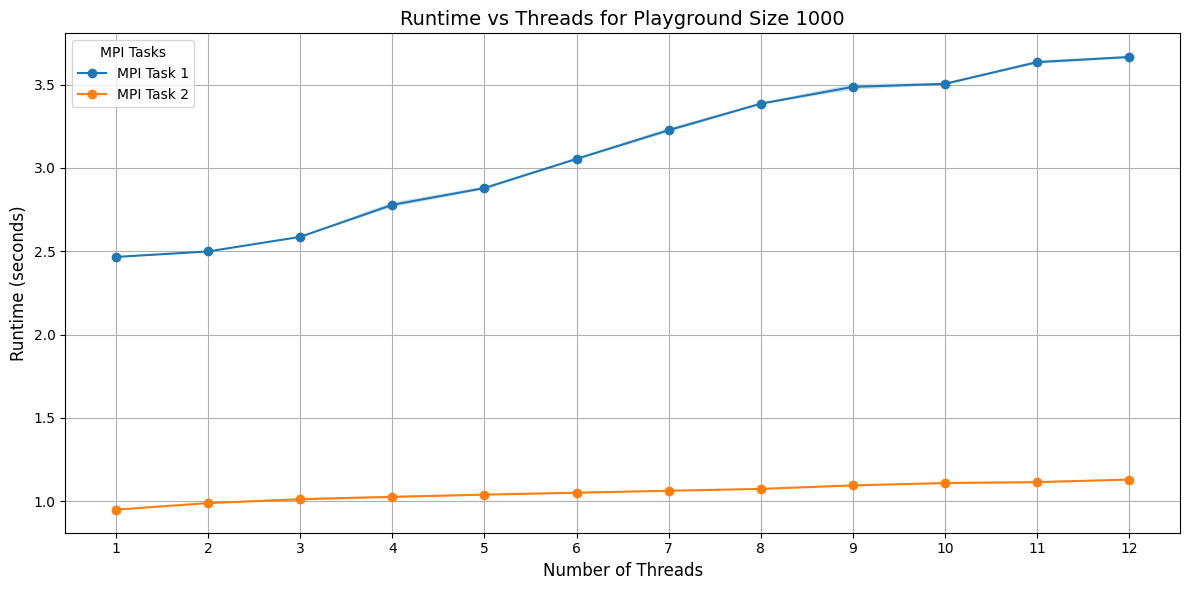

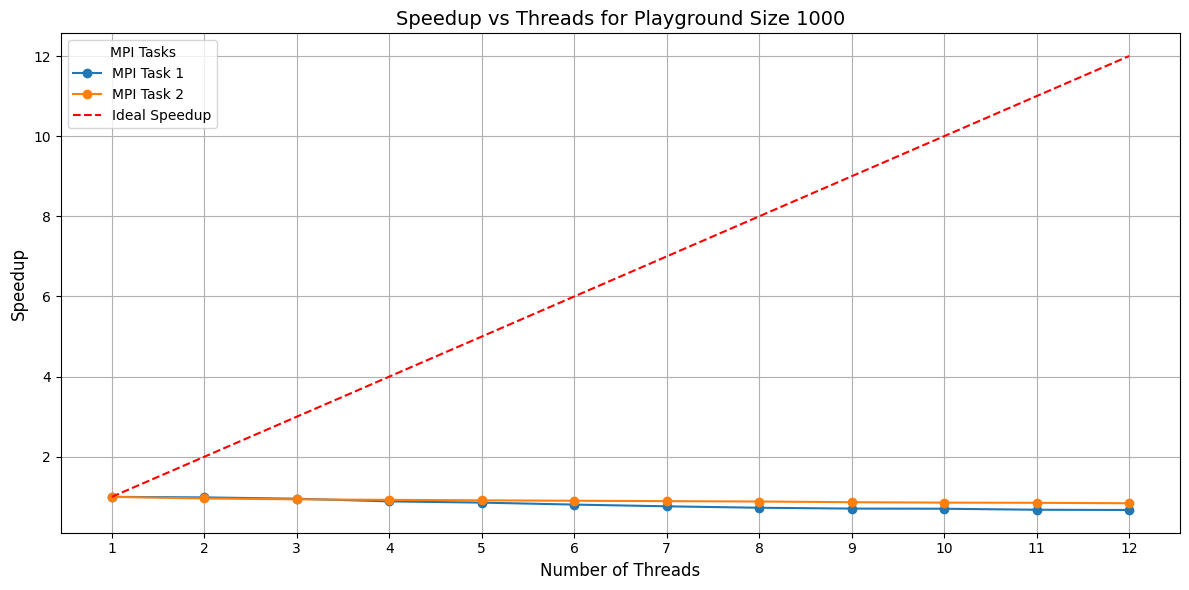

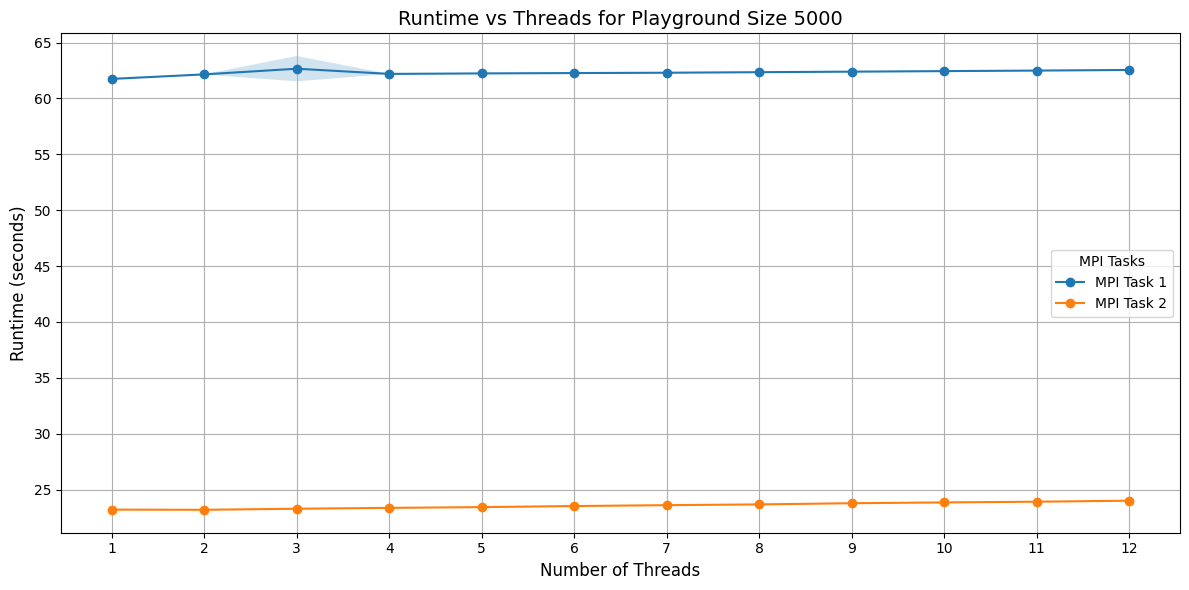

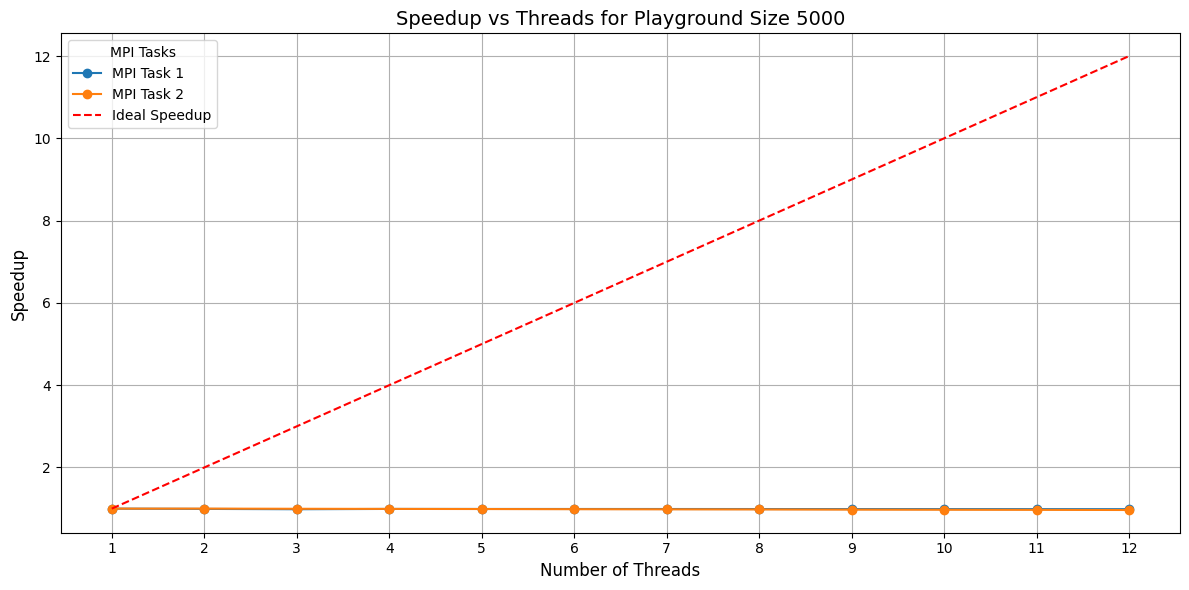

In [3]:
plot_omp_scalability('data/ordered/ordered_omp_results.csv')

In [4]:
def plot_mpi_strong_scalability(csv_path):
    """
    Parameters:
        csv_path (str): Path to the CSV file containing strong scaling MPI data.
    
    The function plots both runtime vs MPI tasks and speedup vs MPI tasks for different matrix sizes.
    """
    # Load data
    df_mpi = pd.read_csv(csv_path)

    # Group and aggregate data by playground size and MPI tasks
    agg_data = df_mpi.groupby(['playground_size', 'mpi_task'])['runtime'].agg(['mean', 'std']).reset_index()

    # Extract unique matrix sizes
    sizes = agg_data['playground_size'].unique()

    # Plot Runtime vs MPI Tasks for different matrix sizes
    plt.figure(figsize=(12, 6))
    for size in sizes:
        # Filter data for the specific matrix size
        filt_data = agg_data[agg_data['playground_size'] == size]

        # Plot runtime with error bars
        plt.plot(filt_data['mpi_task'], filt_data['mean'], label=f'Matrix Size {size}', marker='o')
        plt.fill_between(filt_data['mpi_task'], 
                         filt_data['mean'] - filt_data['std'], 
                         filt_data['mean'] + filt_data['std'], 
                         alpha=0.2)

    plt.title('Runtime vs MPI Tasks', fontsize=14)
    plt.xlabel('Number of MPI Tasks', fontsize=12)
    plt.ylabel('Runtime (s)', fontsize=12)
    plt.legend(title='Matrix Sizes')
    plt.xticks(filt_data['mpi_task'])
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot Speedup vs MPI Tasks
    plt.figure(figsize=(12, 6))
    for size in sizes:
        # Filter data for the specific matrix size
        filt_data = agg_data[agg_data['playground_size'] == size].copy()

        # Compute speedup
        single_task_runtime = filt_data[filt_data['mpi_task'] == 1]['mean'].values[0]
        filt_data.loc[:, 'speedup'] = single_task_runtime / filt_data['mean']
        filt_data.loc[:, 'speedup_std'] = (filt_data['std'] / filt_data['mean']) * filt_data['speedup']

        # Plot speedup with error bars
        plt.plot(filt_data['mpi_task'], filt_data['speedup'], label=f'Matrix Size {size}', marker='o')
        plt.fill_between(filt_data['mpi_task'], 
                         filt_data['speedup'] - filt_data['speedup_std'], 
                         filt_data['speedup'] + filt_data['speedup_std'], 
                         alpha=0.2)

    # Plot ideal speedup line
    plt.plot(filt_data['mpi_task'], filt_data['mpi_task'], linestyle='--', color='r', label='Ideal Speedup')

    plt.title('Speedup vs MPI Tasks', fontsize=14)
    plt.xlabel('Number of MPI Tasks', fontsize=12)
    plt.ylabel('Speedup', fontsize=12)
    plt.legend(title='Matrix Sizes')
    plt.xticks(filt_data['mpi_task'])
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [5]:
plot_mpi_strong_scalability('data/static/static_strongmpi_results8.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data/static/static_strongmpi_results8.csv'

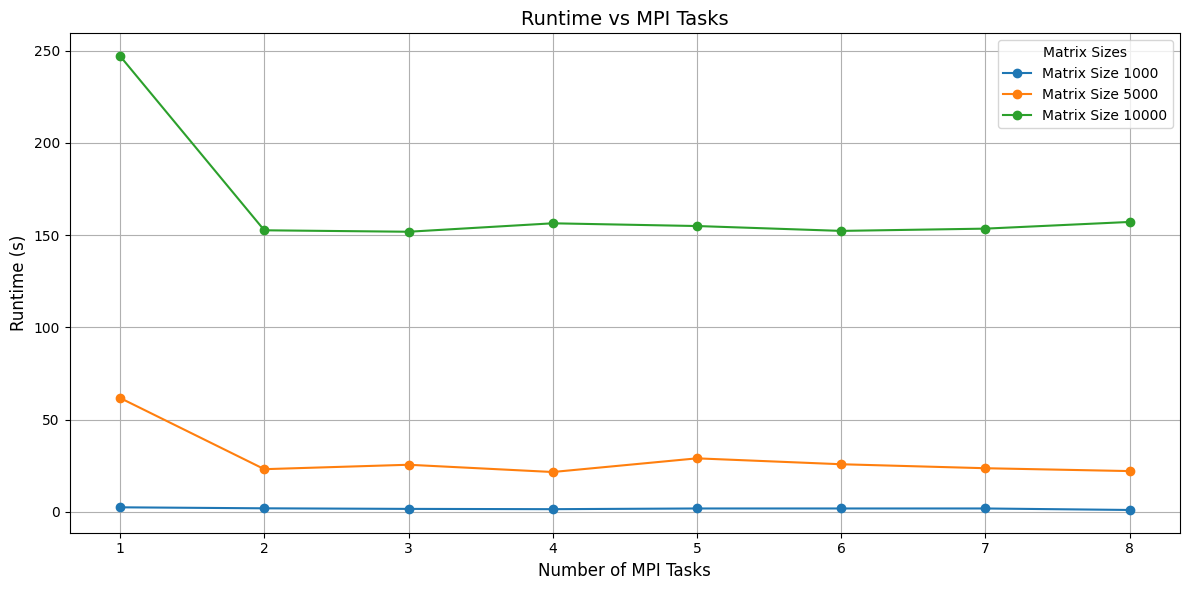

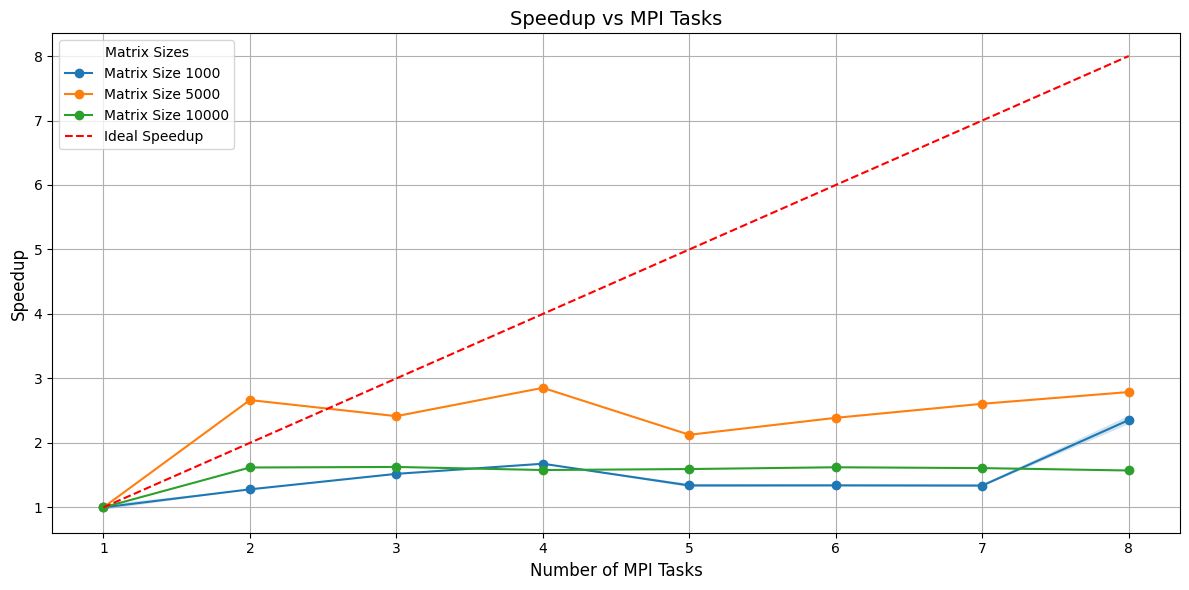

In [ ]:
plot_mpi_strong_scalability('data/ordered/ordered_strongmpi_results.csv')

In [6]:
def plot_mpi_weak_scalability(csv_path):
    """
    Parameters:
        csv_path (str): Path to the CSV file containing strong scaling MPI data.
    
    The function plots both runtime vs MPI tasks and speedup vs MPI tasks for different matrix sizes.
    """
    # Load data
    df_mpi = pd.read_csv(csv_path)

    # Group and aggregate data by playground size and MPI tasks
    agg_data = df_mpi.groupby(['mpi_task'])['runtime'].agg(['mean', 'std']).reset_index()

    # Plot Runtime vs MPI Tasks for different matrix sizes
    plt.figure(figsize=(12, 6))

    plt.plot(agg_data['mpi_task'], agg_data['mean'], marker='o')
    plt.fill_between(agg_data['mpi_task'], 
                     agg_data['mean'] - agg_data['std'], 
                     agg_data['mean'] + agg_data['std'], 
                     alpha=0.2)

    plt.title('Runtime vs MPI Tasks', fontsize=14)
    plt.xlabel('Number of MPI Tasks', fontsize=12)
    plt.ylabel('Runtime (s)', fontsize=12)
    plt.xticks(agg_data['mpi_task'])
    plt.grid(True)
    plt.tight_layout()
    plt.show()

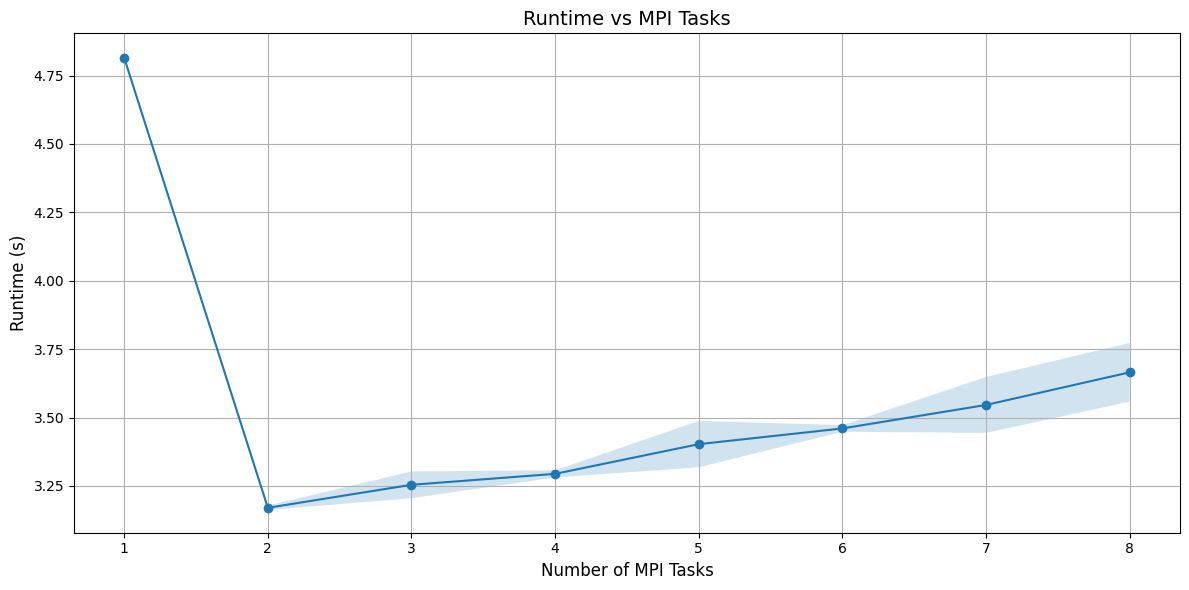

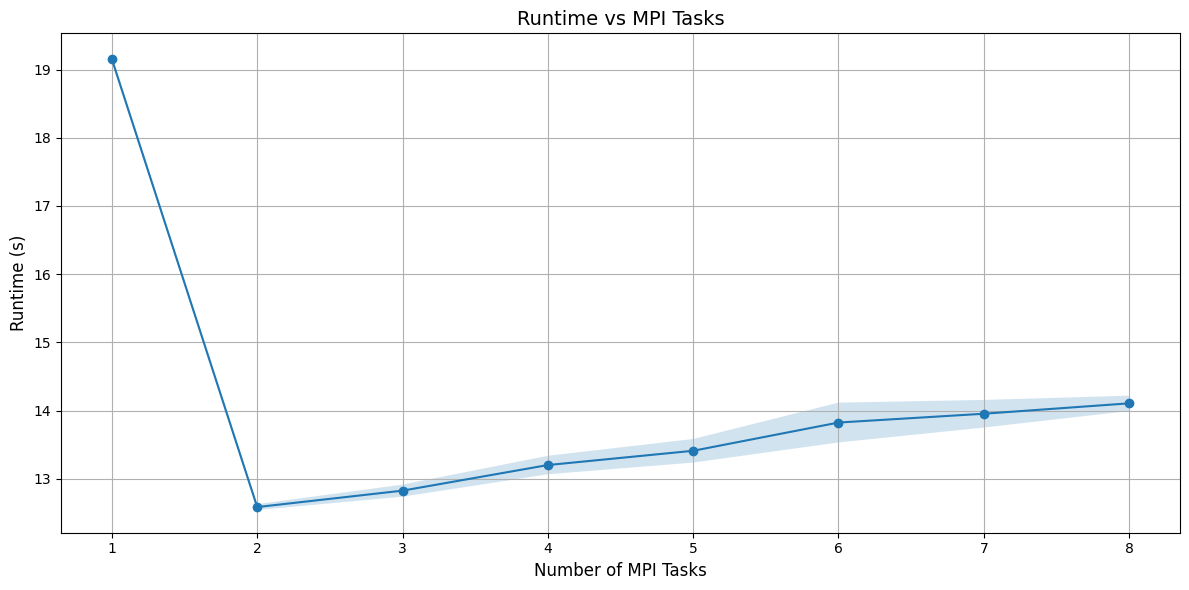

In [18]:
plot_mpi_weak_scalability('data/static/static_weakmpi_results_5.csv')
plot_mpi_weak_scalability('data/static/static_weakmpi_results_10.csv')

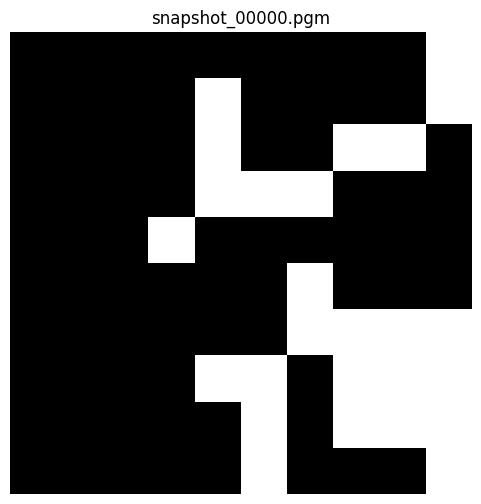

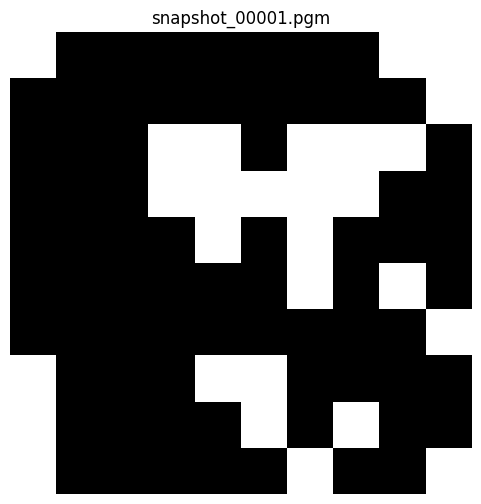

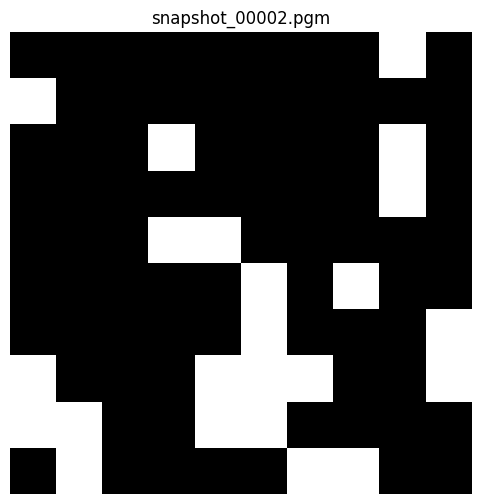

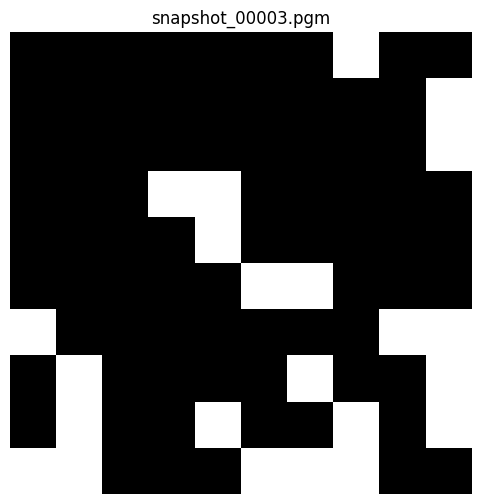

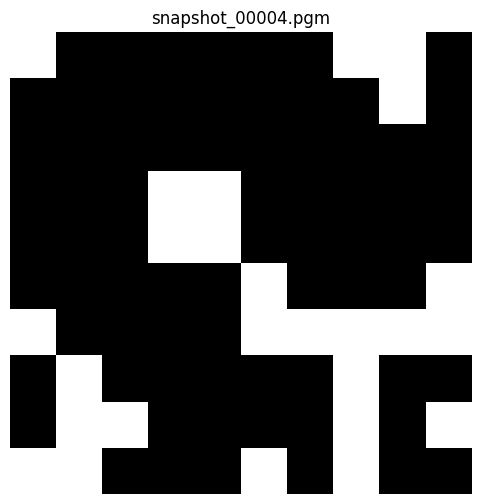

In [8]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Function to visualize all .pgm files in a folder
def visualize_pgm_files(folder_path):
    # Check if the folder exists
    if not os.path.isdir(folder_path):
        print(f"The folder '{folder_path}' does not exist.")
        return
    
    # Get all .pgm files in the folder
    pgm_files = [f for f in os.listdir(folder_path) if f.endswith('.pgm')]
    
    if not pgm_files:
        print("No .pgm files found in the folder.")
        return

    # Visualize each .pgm file
    for pgm_file in pgm_files:
        file_path = os.path.join(folder_path, pgm_file)
        
        # Load the .pgm file
        try:
            img = Image.open(file_path)
            plt.figure(figsize=(6, 6))
            plt.imshow(img, cmap='gray')
            plt.title(pgm_file)
            plt.axis('off')
            plt.show()
        except Exception as e:
            print(f"Error loading {pgm_file}: {e}")

# Example: Replace 'your_folder_path' with the actual path to your folder
folder_path = "your_folder_path"
visualize_pgm_files(r"C:\Users\leona\Documents\GitHub\FHPC_clone\FHPC\exercise_1\moving")
